# Keras Functional API

This notebook illustrates the construction of models using both the Sequential and Functional APIs. A model is first built using the Sequential API, followed by an equivalent model constructed with the Functional API. Both models share the same architecture, allowing for a direct comparison in training and evaluation processes. The steps involved in building, training, and evaluating these models are detailed in the following sections.

## Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pydot
from tensorflow.keras.models import Model

## Sequential API

Here is how we use the `Sequential()` class to build a model.

In [ ]:
def build_sequential_model():

    # Instantiate a Sequential class and linearly stack the layers of the model
    seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    return seq_model

## Functional API

Building the same model as above using Functional API

In [ ]:
def build_functional_model():

    # Instantiate the input Tensor
    input_layer = tf.keras.Input(shape=(28, 28))

    # Stack the layers using the syntax: new_layer()(previous_layer)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)

    # Declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)

    return func_model

## Build the model and visualize the model graph

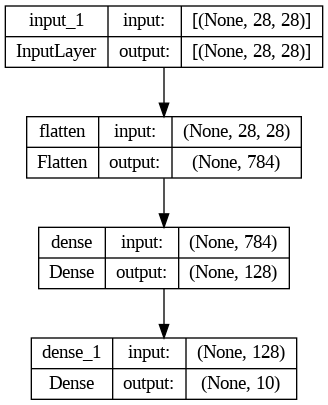

In [ ]:
# Building the model with Functional API
model = build_functional_model()

# Building the model with Sequential API
#model = build_sequential_model()

# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

## Training the model

Regardless of the API, the steps for training and evaulating the model are the same.

In [ ]:
# Prepare fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# Configure, train, and evaluate the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5007 - accuracy: 0.8239
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3802 - accuracy: 0.8629
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3379 - accuracy: 0.8752
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3155 - accuracy: 0.8828
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3542 - accuracy: 0.8721


[0.3542211651802063, 0.8720999956130981]